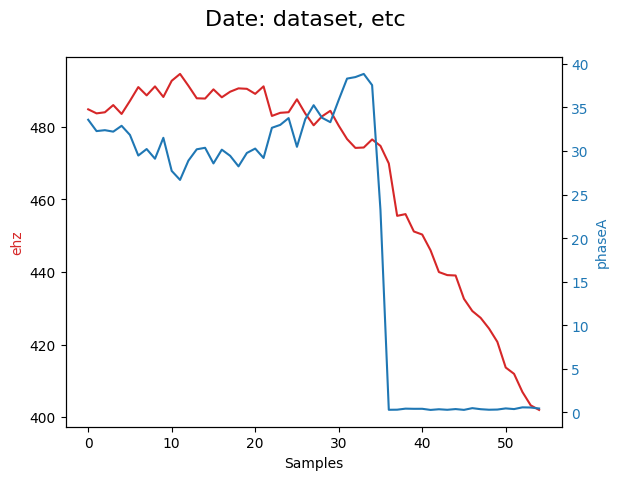

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import parse_data # helper script

# URL = input()
URL = 'https://raw.githubusercontent.com/owhite/ebike_data/main/datasets/first_set'
page = parse_data.get_web_page(URL)
data = parse_data.make_frame(page)

df = pd.DataFrame(data)

df['phaseA'] = np.sqrt( (df['idq_d'] * df['idq_d']) + (df['idq_q'] * df['idq_q']) )

t = np.arange(len(df['ehz']))

fig, ax1 = plt.subplots()
fig.suptitle('Date: dataset, etc', fontsize=16)
ax1.set_xlabel("Samples", color='black')

color = 'tab:red'
ax1.set_ylabel("ehz", color=color)
ax1.plot(t, df['ehz'], color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('phaseA', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(t, df['phaseA'], color=color)

# ax1.title("Data and Time of Data Collection")
#plt.plot()

plt.show()    

In [3]:
pwd

'/Users/owhite/ebike_data'